In [65]:
# Initialize Otter
import otter
grader = otter.Notebook("lab04.ipynb")

# Lab 4: Visualization, Transformations, and KDEs

### Objective
In this lab you will get some practice plotting, applying data transformations, and working with kernel density estimators (KDEs).  We will be working with data from the World Bank containing various statistics for countries and territories around the world. 

**This lab is due Tuesday, September 20 at 11:59 PM.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here*

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import ds100_utils

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Loading Data

Let us load some World Bank data into a `pd.DataFrame` object named ```wb```.

In [67]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns.  Take a look:

In [68]:
display(Markdown('\n'.join(fr'{i + 1}. {c}'.replace('$', r'\$') for i, c in enumerate(wb.columns))))



1. Primary completion rate: Male: % of relevant age group: 2015
2. Primary completion rate: Female: % of relevant age group: 2015
3. Lower secondary completion rate: Male: % of relevant age group: 2015
4. Lower secondary completion rate: Female: % of relevant age group: 2015
5. Youth literacy rate: Male: % of ages 15-24: 2005-14
6. Youth literacy rate: Female: % of ages 15-24: 2005-14
7. Adult literacy rate: Male: % ages 15 and older: 2005-14
8. Adult literacy rate: Female: % ages 15 and older: 2005-14
9. Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015
10. Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015
11. Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015
12. Population: millions: 2016
13. Surface area: sq. km thousands: 2016
14. Population density: people per sq. km: 2016
15. Gross national income, Atlas method: \$ billions: 2016
16. Gross national income per capita, Atlas method: \$: 2016
17. Purchasing power parity gross national income: \$ billions: 2016
18. per capita: \$: 2016
19. Gross domestic product: % growth : 2016
20. per capita: % growth: 2016
21. Prevalence of smoking: Male: % of adults: 2015
22. Prevalence of smoking: Female: % of adults: 2015
23. Incidence of tuberculosis: per 100,000 people: 2015
24. Prevalence of diabetes: % of population ages 20 to 79: 2015
25. Incidence of HIV: Total: % of uninfected population ages 15-49: 2015
26. Prevalence of HIV: Total: % of population ages 15-49: 2015
27. Prevalence of HIV: Women's share of population ages 15+ living with HIV: %: 2015
28. Prevalence of HIV: Youth, Male: % of population ages 15-24: 2015
29. Prevalence of HIV: Youth, Female: % of population ages 15-24: 2015
30. Antiretroviral therapy coverage: % of people living with HIV: 2015
31. Cause of death: Communicable diseases and maternal, prenatal, and nutrition conditions: % of population: 2015
32. Cause of death: Non-communicable diseases: % of population: 2015
33. Cause of death: Injuries: % of population: 2015
34. Access to an improved water source: % of population: 1990
35. Access to an improved water source: % of population: 2015
36. Access to improved sanitation facilities: % of population: 1990
37. Access to improved sanitation facilities: % of population: 2015
38. Child immunization rate: Measles: % of children ages 12-23 months: 2015
39. Child immunization rate: DTP3: % of children ages 12-23 months: 2015
40. Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016
41. Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016
42. Children sleeping under treated bed nets: % of children under age 5: 2009-2016
43. Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016
44. Tuberculosis: Treatment success rate: % of new cases: 2014
45. Tuberculosis: Cases detection rate: % of new estimated cases: 2015

# Part 1: Scaling

In the first part of this assignment we will look at the distribution of values for combined adult literacy rate as well as the gross national income per capita. The code below creates a copy of the DataFrame that contains only the two Series we want, and then drops all rows that contain null values in either column.

**Note:** For this lab we are dropping null values without investigating them further. However, this is generally not the best practice and can severely affect our analyses.

Here the combined literacy rate is the sum of the female and male literacy rates as reported by the World Bank. 0 represents no literacy, and 200 would represent total literacy by both genders that are included in the World Bank's dataset.

In this lab, we will be using the `sns.histplot`, `sns.rugplot`, and `sns.displot` function to visualize distributions. You may find it useful to consult the seaborn documentation on [distributions](https://seaborn.pydata.org/tutorial/distributions.html) and [functions](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

In [69]:
#creates a DataFrame with the appropriate index
df = pd.DataFrame(index=wb.index)

#copies the Series we want
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'] + wb["Adult literacy rate: Male: % ages 15 and older: 2005-14"]
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']

#the line below drops all records that have a NaN value in either column
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 147


In [70]:
df.head(5)

,lit,inc
Afghanistan,63.0,580.0
Albania,194.0,4250.0
Algeria,151.0,4270.0
Angola,142.0,3440.0
Antigua and Barbuda,197.0,13400.0


## Question 1a

Suppose we wanted to build a histogram of our data to understand the distribution of literacy rates and income per capita individually. We can use [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) in seaborn to create bar charts from categorical data. 

Text(0.5, 1.0, 'World Bank Combined Adult Literacy Rate')

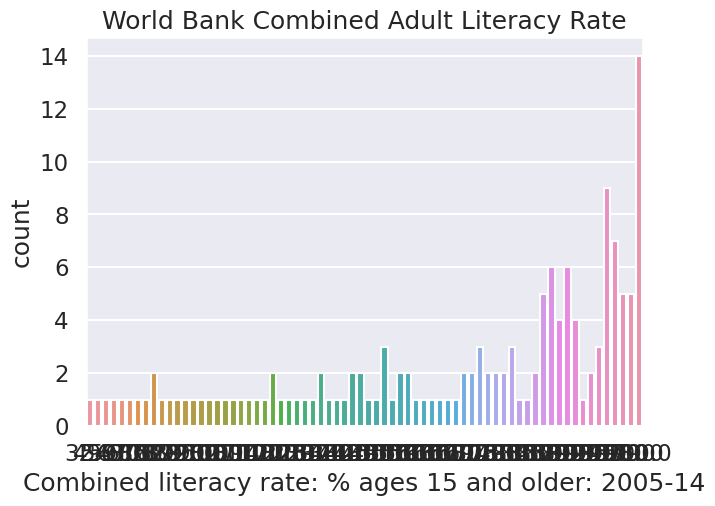

In [71]:
sns.countplot(x = "lit", data = df)
plt.xlabel("Combined literacy rate: % ages 15 and older: 2005-14")
plt.title('World Bank Combined Adult Literacy Rate')

Text(0.5, 1.0, 'World Bank Gross National Income Per Capita')

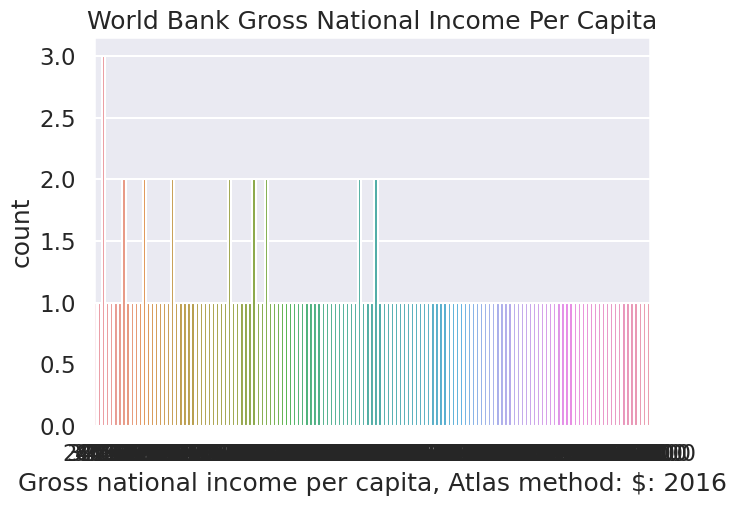

In [72]:
sns.countplot(x = "inc", data = df)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')

In the cell below, explain why `countplot` is NOT the right tool for visualizing the distribution of our data.


countplot is not a right tool for visualizing our data because the two columns in the data frame contain quatitative variables while countplot is a histogram of categorical variables. 

## Question 1b

In the cell below, create a plot of **income per capita** (the second plot above) using the [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function. As above, you should have two subplots, where the left subplot is literacy, and the right subplot is income. 

Don't forget to title the plot and label axes!

**Hint:** *Copy and paste from above to start.*


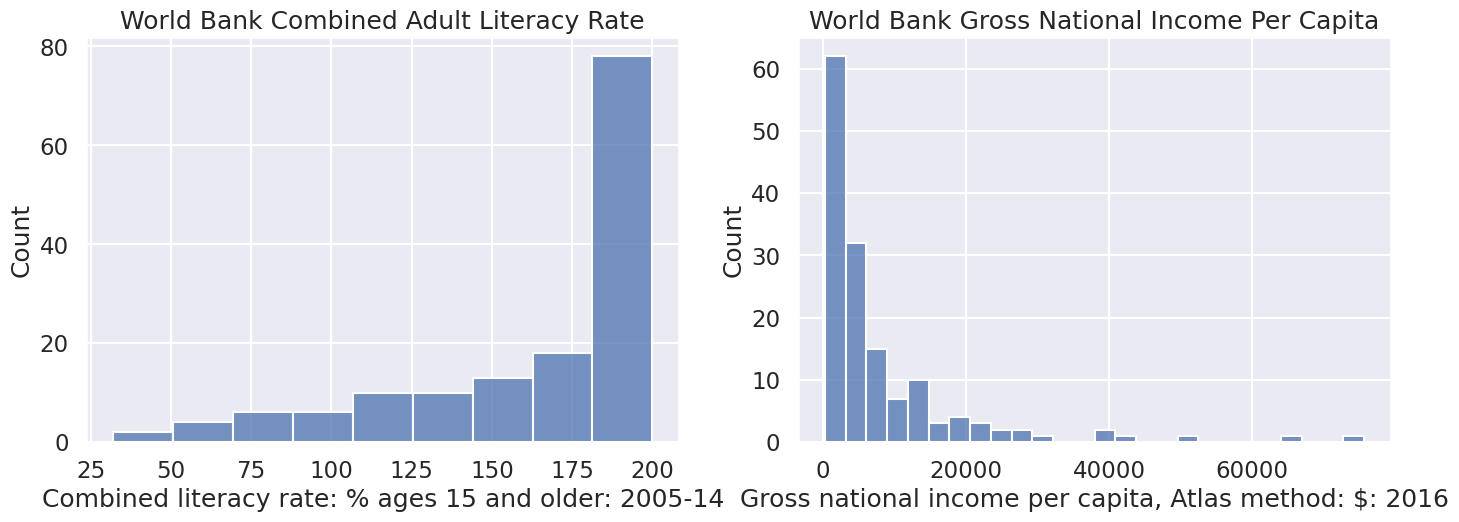

In [73]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(x="lit", data = df)
plt.xlabel("Combined literacy rate: % ages 15 and older: 2005-14")
plt.title('World Bank Combined Adult Literacy Rate')


plt.subplot(1, 2, 2)
sns.histplot(x = "inc", data = df)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')

plt.show()



You should see histograms that show the counts of how many data points appear in each bin. `distplot` uses a heuristic called the Freedman-Diaconis rule to automatically identify the best bin sizes, though it is possible to set the bins yourself (we won't).


In the cell below, we explore overlaying a rug plot on top of a histogram using `rugplot`. Note that the rug plot is hard to see.

Text(0.5, 1.0, 'World Bank Gross National Income Per Capita')

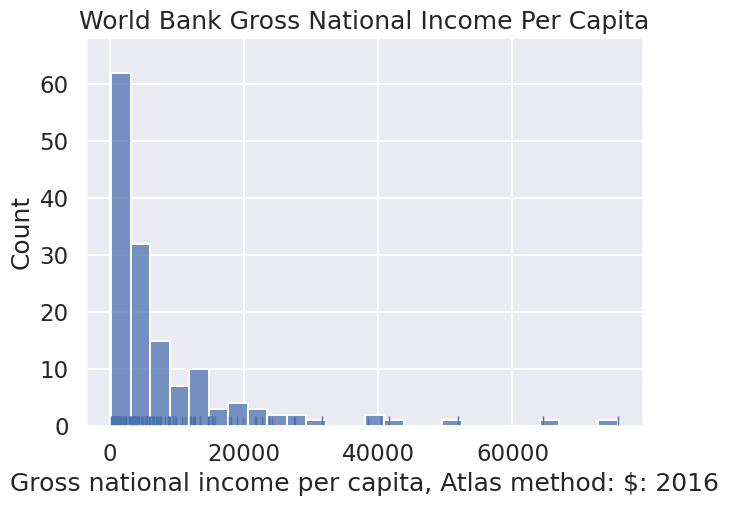

In [74]:
sns.histplot(x="inc", data = df)
sns.rugplot(x="inc", data = df)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')

One way to make it easier to see the difference between the rug plot and the bars is to set a different color, for example:

Text(0.5, 1.0, 'World Bank Gross National Income Per Capita')

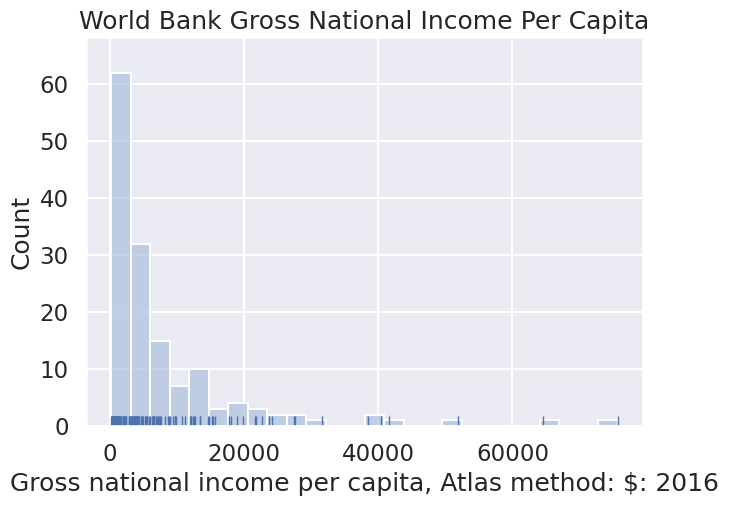

In [75]:
sns.histplot(x="inc", data = df, color = "lightsteelblue")
sns.rugplot(x="inc", data = df)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')

There is also another function called `kdeplot` which plots a Kernel Density Estimate as described in class, and covered in more detail later in this lab.

Rather than manually calling `histplot`, `rugplot`, and `kdeplot` to plot histograms, rug plots, and KDE plots, respectively, we can instead use `displot`, which can simultaneously plot histogram bars, a rug plot, and a KDE plot, and adjust all the colors automatically for visbility. Using the documentation for [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) ([Link](https://seaborn.pydata.org/generated/seaborn.displot.html)), make a plot of the income data that includes a histogram, rug plot, and KDE plot. Hint: You'll need to set two parameters to `True`.

Text(0.5, 1.0, 'World Bank Gross National Income Per Capita')

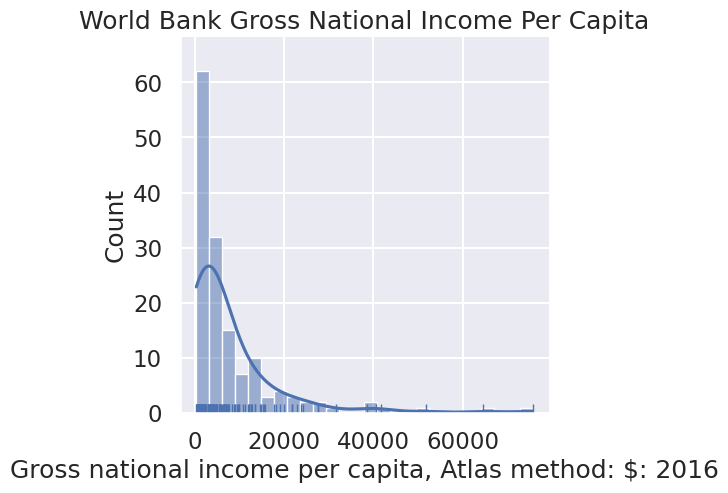

In [76]:
sns.displot(x="inc", data = df, rug = True, kde = True)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')

You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. 

Above, the y-axis is labeled by the counts. We can also label the y-axis by the density. An example is given below, this time using the literacy data from the beginning of this lab.

Text(0.5, 1.0, 'World Bank Combined Adult Literacy Rate')

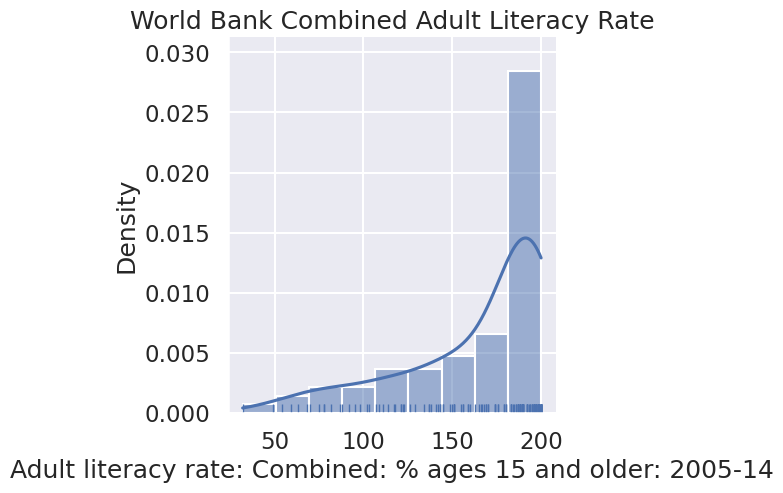

In [77]:
sns.displot(x="lit", data = df, rug = True, kde = True, stat = "density")
plt.xlabel("Adult literacy rate: Combined: % ages 15 and older: 2005-14")
plt.title('World Bank Combined Adult Literacy Rate')

Observations:
* You'll also see that the y-axis value is no longer the count. Instead it is a value such that the total **area** in the histogram is 1. For example, the area of the last bar is approximately 22.22 * 0.028 = 0.62

* The KDE is a smooth estimate of the distribution of the given variable. The area under the KDE is also 1. While it is not obvious from the figure, some of the area under the KDE is beyond the 100% literacy. In other words, the KDE is non-zero for values greater than 100%. This, of course, makes no physical sense. Nonetheless, it is a mathematical feature of the KDE.

We'll talk more about KDEs later in this lab.

## Question 1c

Looking at the income data, it is difficult to see the distribution among low income countries because they are all scrunched up at the left side of the plot. The KDE also has a problem where the density function has a lot of area below 0. 

Transforming the `inc` data logarithmically gives us a more symmetric distribution of values. This can make it easier to see patterns.

In addition, summary statistics like the mean and standard deviation (square-root of the variance) are more stable with symmetric distributions.

In the cell below, make a distribution plot of `inc` with the data transformed using `np.log10` and `kde=True`. If you want to see the exact counts, just set `kde=False`. If you don't specify the `kde` parameter, it is by default set to True. 

**Hint:** Unlike the examples above, you can pass a series to the `displot` function, i.e. rather than passing an entire DataFrame as `data` and a column as `x`, you can instead pass a series.


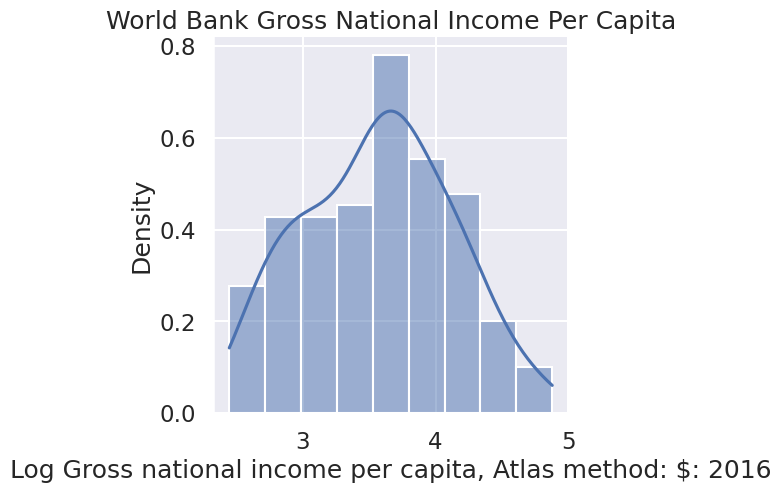

In [78]:
ax = np.log10(df["inc"])
sns.displot(ax, kde=True, stat="density")
plt.title('World Bank Gross National Income Per Capita')
plt.ylabel('Density')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');

When a distribution has a long right tail, a log-transformation often does a good job of symmetrizing the distribution, as it did here.  Long right tails are common with variables that have a lower limit on the values. 

On the other hand, long left tails are common with distributions of variables that have an upper limit, such as percentages (can't be higher than 100%) and GPAs (can't be higher than 4).  That is the case for the literacy rate. Typically taking a power-transformation such 
as squaring or cubing the values can help symmetrize the left skew distribution.

In the cell below, we will make a distribution plot of `lit` with the data transformed using a power, i.e., raise `lit` to the 2nd, 3rd, and 4th power. We plot the transformation with the 4th power below.


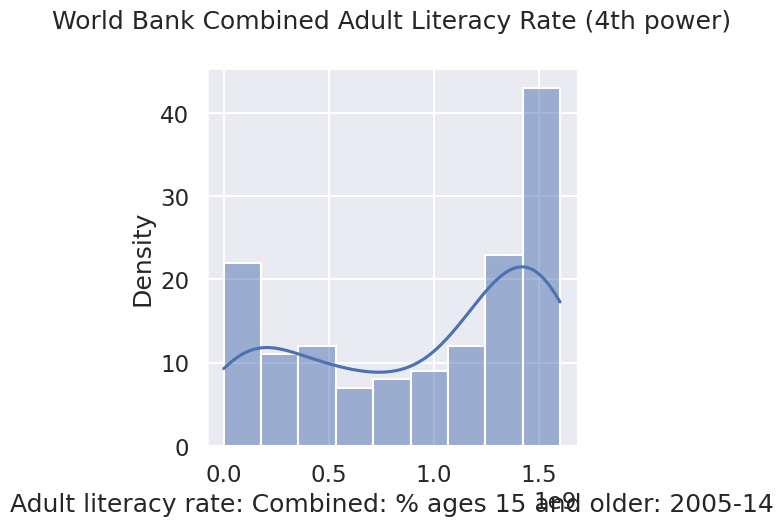

In [79]:
ax = sns.displot((df['lit']**4), kde = True)
plt.ylabel('Density')
plt.xlabel("Adult literacy rate: Combined: % ages 15 and older: 2005-14")
plt.title('World Bank Combined Adult Literacy Rate (4th power)', pad=30);

## Question 1d

If we want to examine the relationship between the combined adult literacy rate and the gross national income per capita, we need to make a scatter plot. 

In the cell below, create a scatter plot of untransformed income per capita and literacy rate using the `sns.scatterplot` function. Make  sure to label both axes using `plt.xlabel` and `plt.ylabel`.


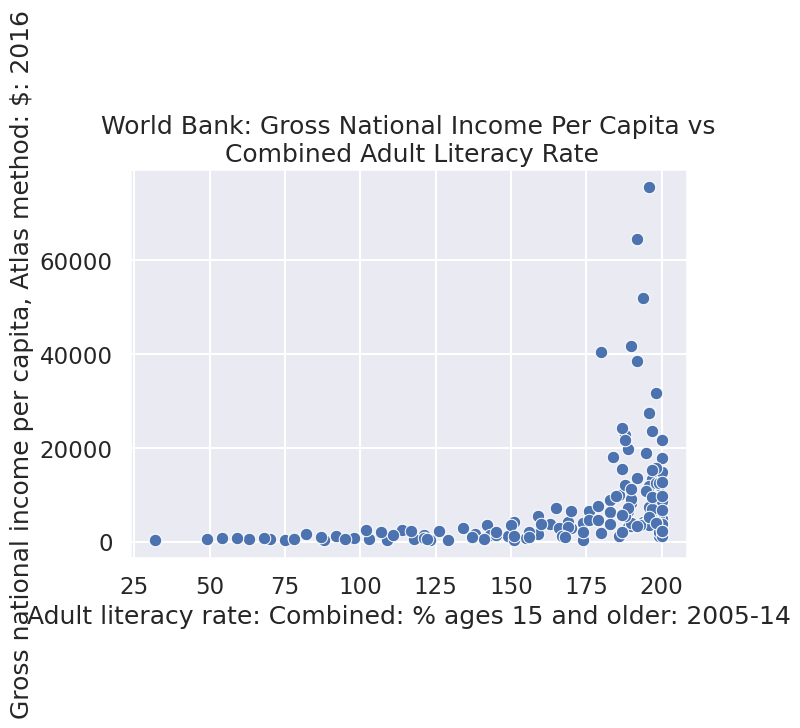

In [80]:
sns.scatterplot(x = df["lit"], y=df["inc"])
plt.xlabel("Adult literacy rate: Combined: % ages 15 and older: 2005-14")
plt.ylabel('Gross national income per capita, Atlas method: $: 2016');
plt.title('World Bank: Gross National Income Per Capita vs\n Combined Adult Literacy Rate');

We can better assess the relationship between two variables when they have been straightened because it is easier for us to recognize linearity.

In the cell below, we see a scatter plot of log-transformed income per capita against literacy rate.


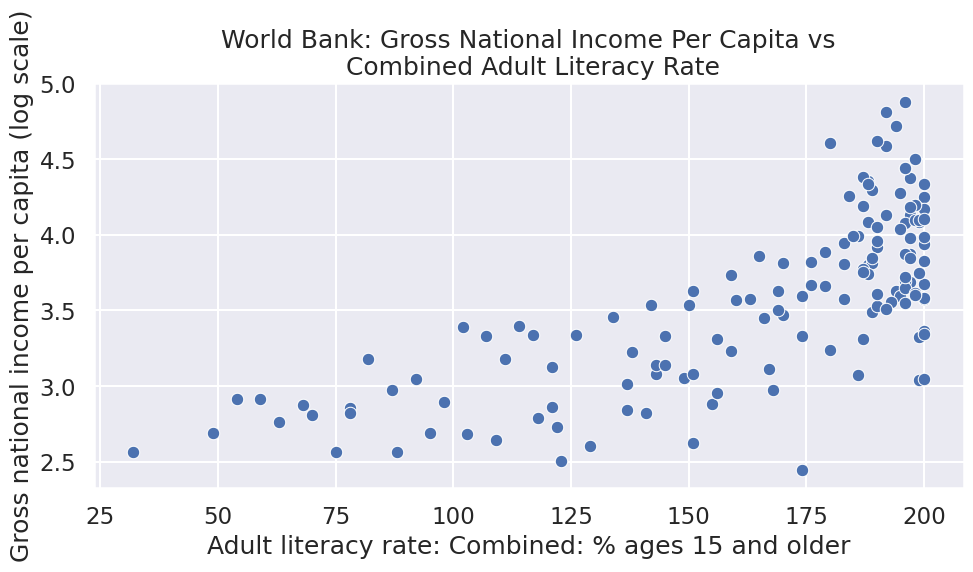

In [81]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df['lit'], y = np.log10(df['inc']))
plt.xlabel("Adult literacy rate: Combined: % ages 15 and older")
plt.ylabel('Gross national income per capita (log scale)')
plt.title('World Bank: Gross National Income Per Capita vs\n Combined Adult Literacy Rate');

This scatter plot looks better. The relationship is closer to linear.

We can think of the log-linear relationship between x and y, as follows: a constant change in x corresponds to a percent (scaled) change in y.

We can also see that the long left tail of literacy is represented in this plot by a lot of the points being bunched up near 100. Try squaring literacy and taking the log of income. Does the plot look better? 


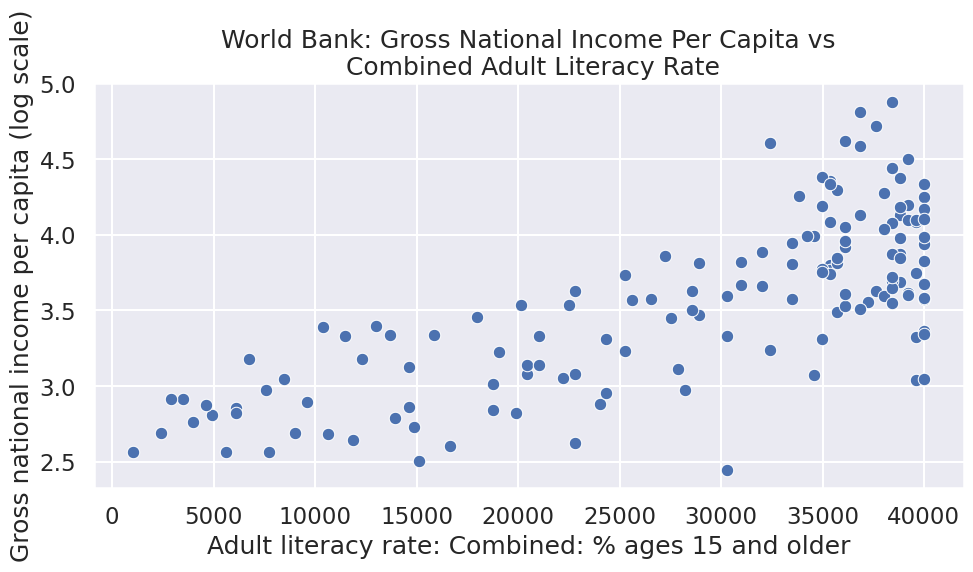

In [82]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df['lit']**2, y = np.log10(df['inc']))
plt.xlabel("Adult literacy rate: Combined: % ages 15 and older")
plt.ylabel('Gross national income per capita (log scale)')
plt.title('World Bank: Gross National Income Per Capita vs\n Combined Adult Literacy Rate');

Choosing the best transformation for a relationship is often a balance between keeping the model simple and straightening the scatter plot.

# Part 2: Kernel Density Estimation

In this part of the lab you will develop a deeper understanding of how kernel density estimation works.
- Explain KDE briefly within the lab

### Overview

Kernel density estimation is used to estimate a probability density function (i.e. a density curve) from a set of data. Just like a histogram, a density function's total area must sum to 1.

KDE centrally revolves around this idea of a "kernel". A kernel is a function whose area sums to 1. The three steps involved in building a kernel density estimate are:
1. Placing a kernel at each observation
2. Normalizing kernels so that the sum of their areas is 1
3. Summing all kernels together

The end result is a function, that takes in some value `x` and returns a density estimate at the point `x`.

When constructing a KDE, there are several choices to make regarding the kernel. Specifically, we need to choose the function we want to use as our kernel, as well as a bandwidth parameter, which tells us how wide or narrow each kernel should be. We will explore these ideas now.

Suppose we have 3 data points with values 2, 4, and 9. We can compute the (useless) histogram with a KDE as shown below.

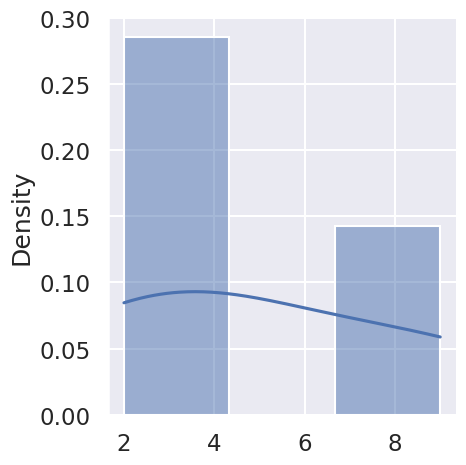

In [83]:
data3pts = np.array([2, 4, 9])
sns.displot(data3pts, kde = True, stat = "density");

To understand how KDEs are computed, we need to see the KDE outside the given range. The easiest way to do this is to use an old function called `distplot`. During the Spring 2022 offering of this course, `distplot` was still a working function in Seaborn, but it will be removed at a future date. If you get an error that says that `distplot` is not a valid function, sorry, you are too far in the future to do this lab exercise.

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


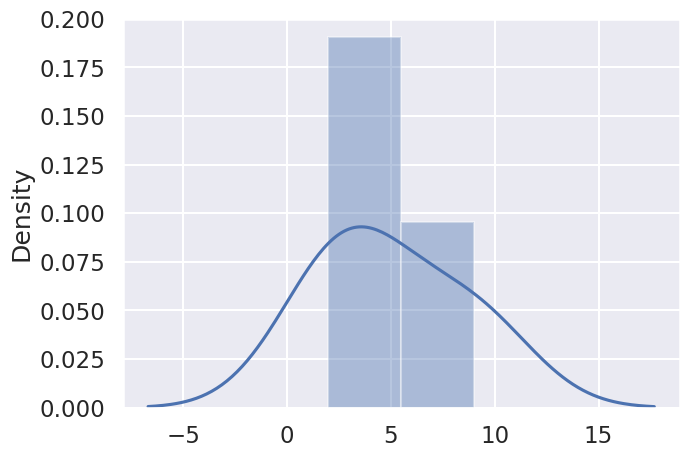

In [84]:
sns.distplot(data3pts, kde = True);

One question you might be wondering is how the kernel density estimator decides how "wide" each point should be. It turns out this is a parameter you can set called `bw`, which stands for bandwith. For example, the code below gives a bandwith value of 0.5 to each data point. You'll see the resulting KDE is quite different. Try experimenting with different values of bandwidth and see what happens.

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


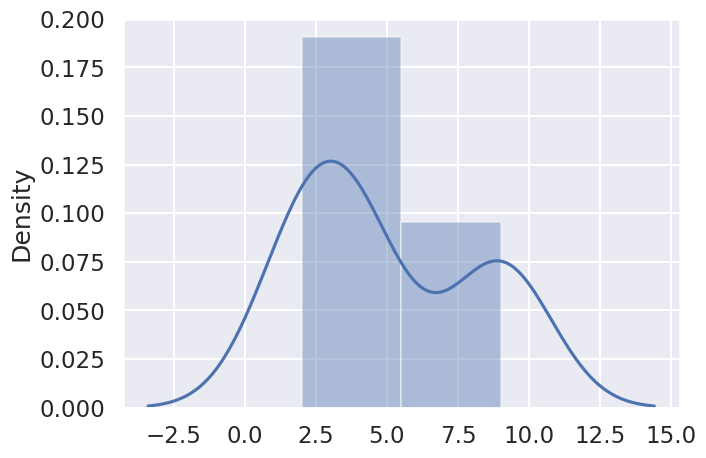

In [85]:
sns.distplot(data3pts, kde = True, kde_kws = {"bw": 0.5});

## Question 2a

As mentioned above, the kernel density estimate (KDE) is just the sum of a bunch of copies of the kernel, each centered on our data points. The default kernel used by the `distplot` function (as well as `kdeplot`) is the Gaussian kernel, given by:

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

We've implemented the Gaussian kernel for you in Python below. Here, `alpha` is the smoothing or bandwidth parameter $\alpha$ for the KDE, `z` is the center of the Gaussian (i.e. a data point or an array of data points), and `x` is an array of values of the variable whose distribution we are plotting.

In [86]:
def gaussian_kernel(alpha, x, z):
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

For example, we can plot the Gaussian kernel centered at 9 with $\alpha$ = 0.5 as below: 

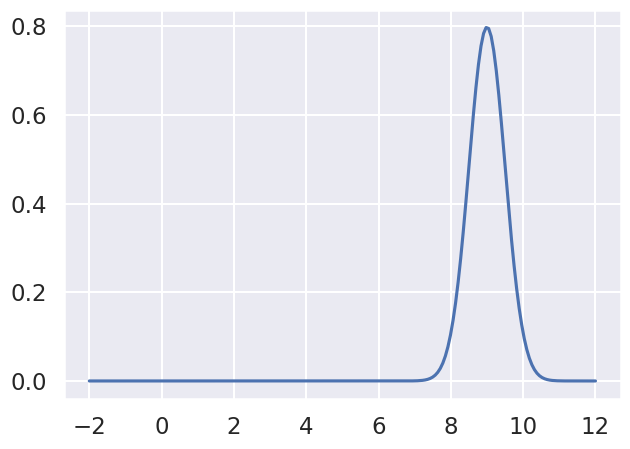

In [87]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, kde_curve);

In the cell below, plot the 3 kernel density functions corresponding to our 3 data points on the same axis. Use an `alpha` value of 0.5. Recall that our three data points are 2, 4, and 9. 

**Note:** Make sure to normalize your kernels! This means that the area under each of your kernels should be $\frac{1}{3}$ since there are three data points.

You don't have to use the following hints, but they might be helpful in simplifying your code.

**Hint:** The `gaussian_kernel` function can also take a numpy array as an argument for `z`.

**Hint:** To plot multiple plots at once, you can use `plt.plot(xs, y)` with a two dimensional array as `y`.


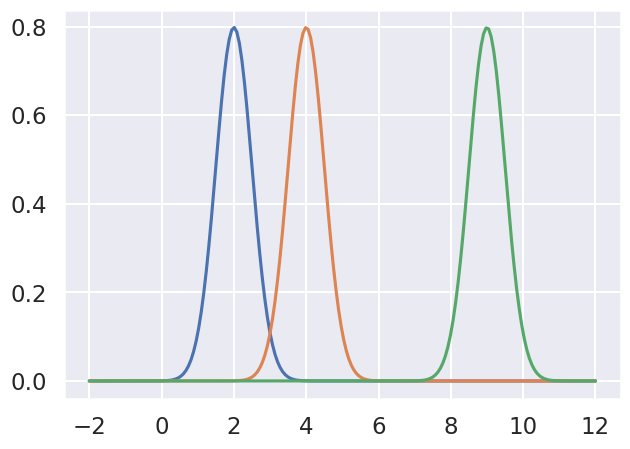

In [88]:
data3pts_curve = [gaussian_kernel(alpha, x, data3pts) for x in xs]
plt.plot(xs, data3pts_curve);

In the cell below, we see a plot that shows the sum of all three of the kernels above. The plot resembles the kde shown when you called `distplot` function with bandwidth 0.5 earlier. The area under the final curve will be 1 since the area under each of the three normalized kernels is $\frac{1}{3}$.


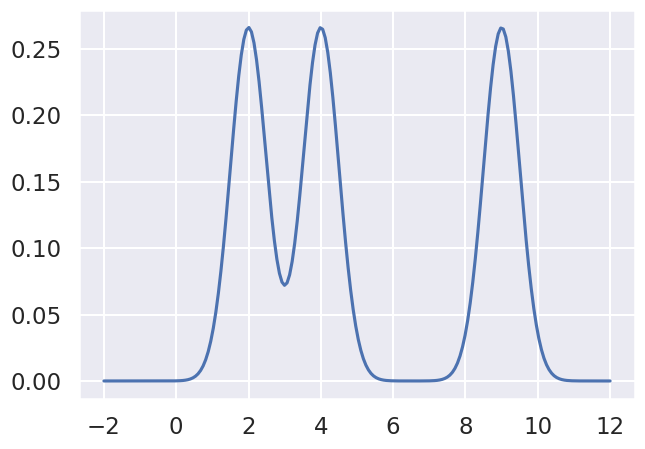

In [89]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = np.array([1/3 * gaussian_kernel(alpha, x, data3pts) for x in xs])
plt.plot(xs, np.sum(kde_curve, axis = 1));

Recall that earlier we plotted the kernel density estimation for the logarithm of the income data, as shown again below.

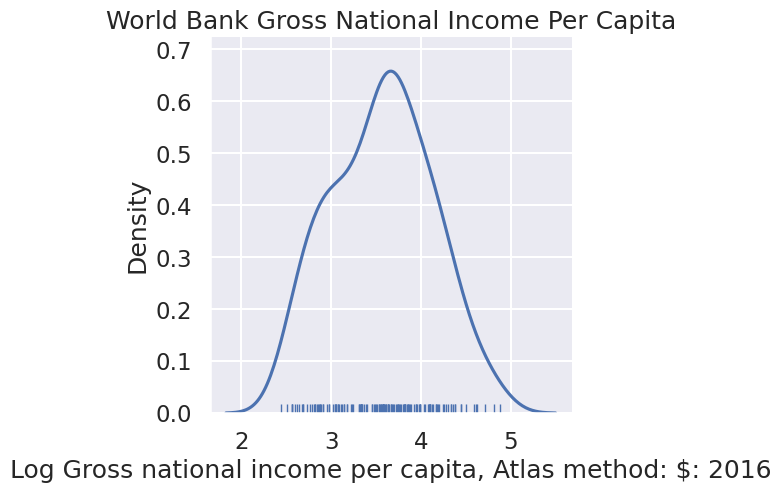

In [90]:
ax = sns.displot(np.log10(df['inc']), kind = "kde", rug = True)
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');

In the cell below, a similar plot is shown using what was done in 2a. Try out different values of alpha in {0.1, 0.2, 0.3, 0.4, 0.5}. You will see that when alpha=0.2, the graph matches the previous graph well, except that the `displot` function hides the KDE values outside the range of the available data.

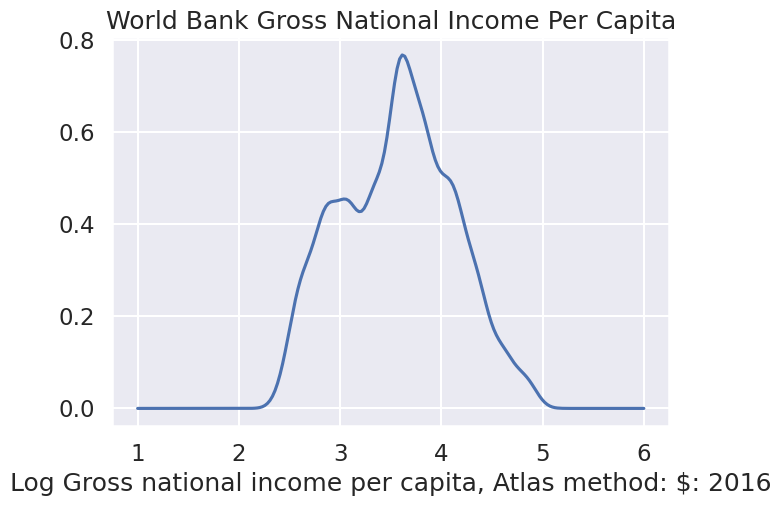

In [91]:
xs = np.linspace(1, 6, 200)
alpha=0.1
kde_curve = np.array([1/len(df['inc']) * gaussian_kernel(alpha, x, np.log10(df['inc'])) for x in xs])
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016')
plt.plot(xs, np.sum(kde_curve, axis = 1));

## Question 2b

In your answers above, you hard-coded a lot of your work. In this problem, you'll build a more general kernel density estimator function.

Implement the KDE function which computes:

$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where $z_i$ are the data, $\alpha$ is a parameter to control the smoothness, and $K_\alpha$ is the kernel density function passed as `kernel`.


In [94]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function with 3 parameters: alpha, x, data
        alpha: the smoothing parameter to pass to the kernel
        x: a single query point (in one dimension)
        data: a numpy array of data points

    Returns:
        The smoothed estimate at the query point x
    """    
    n = len(data)
    return sum(kernel(alpha, x, data))/n

In [95]:
grader.check("q2b")

q2b results: All test cases passed!

Assuming you implemented `kde` correctly, the code below should generate the `kde` of the log of the income data as before.

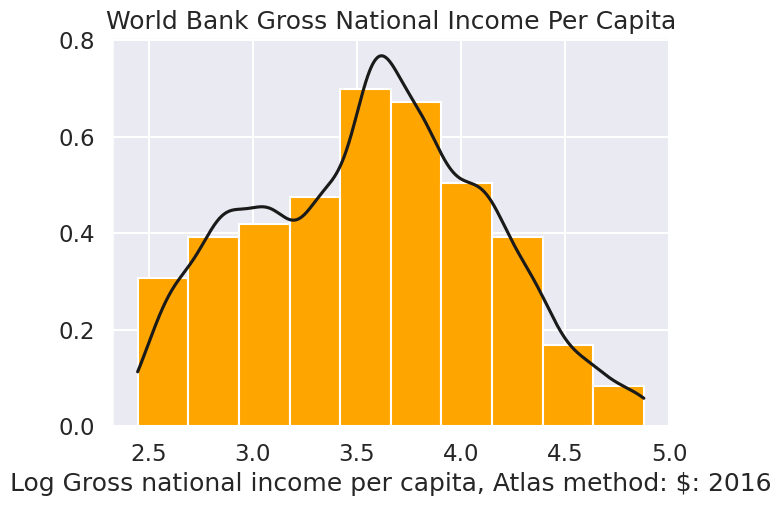

In [96]:
df['trans_inc'] = np.log10(df['inc'])
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], density=True, color='orange')
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');
plt.plot(xs, curve, 'k-');

And the code below should show a 3 x 3 set of plots showing the output of the kde for different `alpha` values.

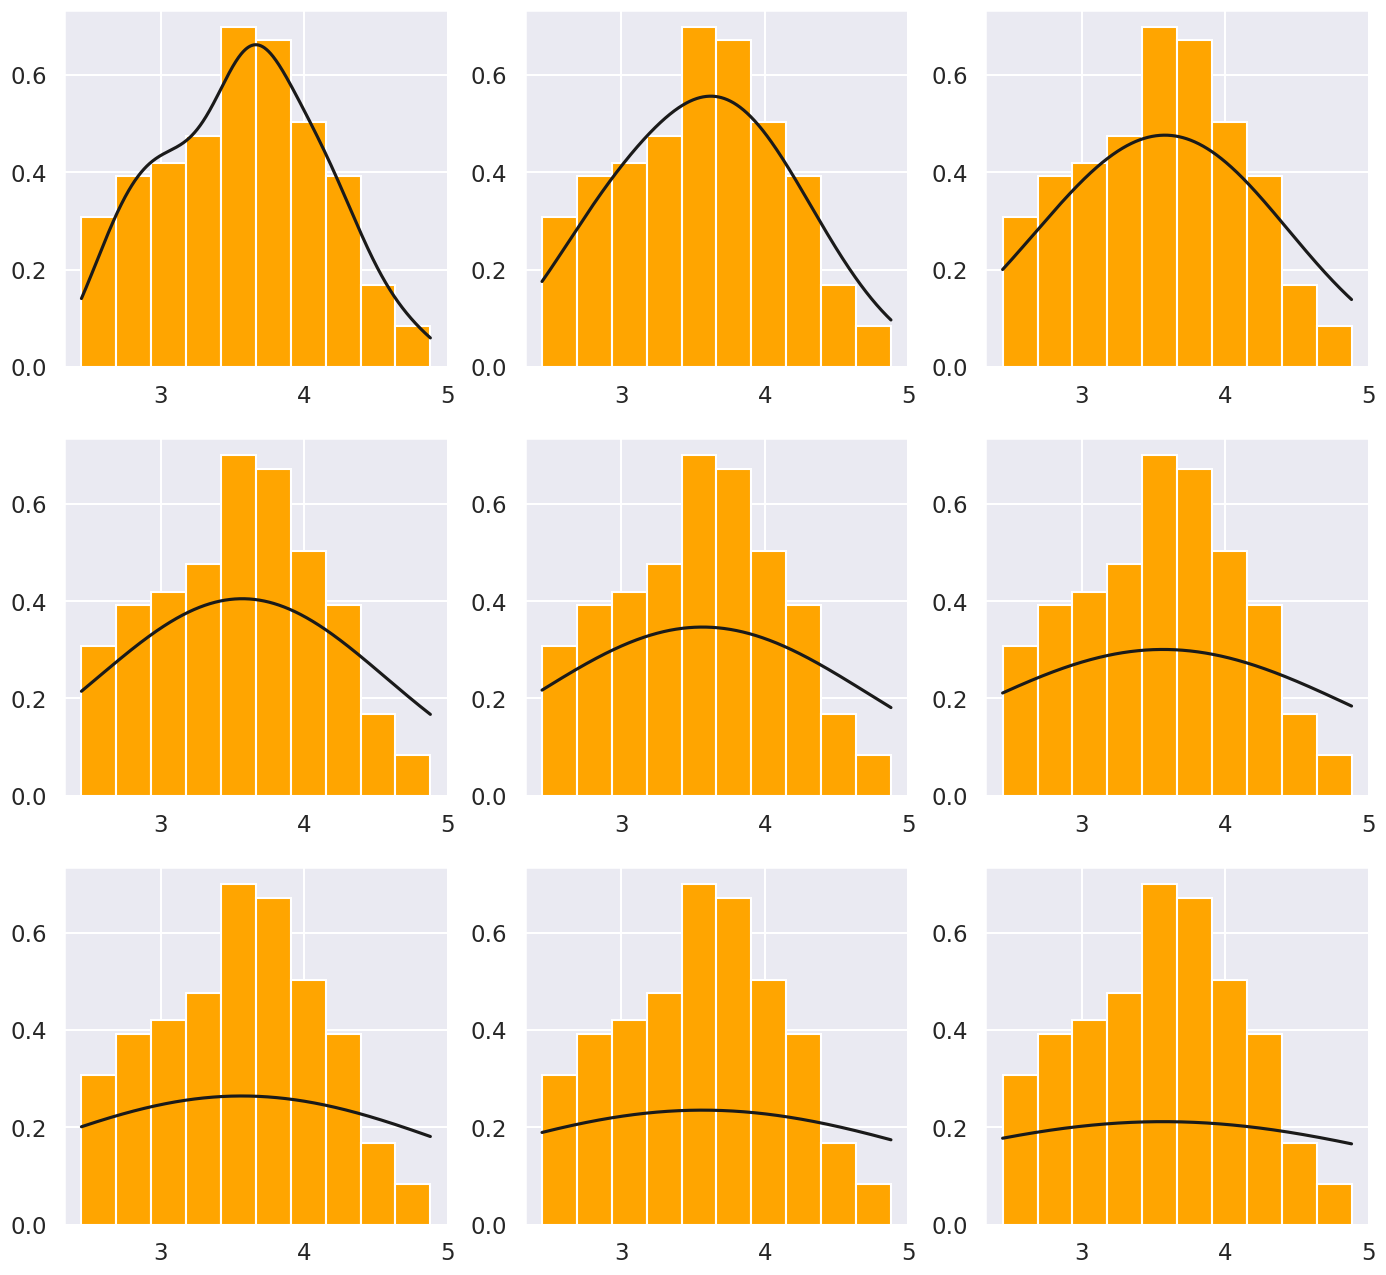

In [97]:
plt.figure(figsize=(15,15))
alphas = np.arange(0.2, 2.0, 0.2)
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i+1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], density=True, color='orange')
    plt.plot(xs, curve, 'k-')
plt.show()

Let's take a look at another kernel, the Boxcar kernel.

In [98]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

Run the cell below to enable interactive plots. It should give you a green 'OK' when it's finished.

In [99]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Now, we can plot the Boxcar and Gaussian kernel functions to see what they look like.

In [100]:
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=1.0), Output()), _dom_classes=…

Using the interactive plot below compare the the two kernel techniques:  (Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [101]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], density=True, color='orange')
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1));

interactive(children=(FloatSlider(value=0.25, description='alpha_g', max=0.5, min=0.01, step=0.01), FloatSlide…

Briefly compare and contrast the Gaussian and Boxcar kernels in the cell below. How do the two kernels relate with each other for the same alpha value?

Although both kernels overlap with each other for small values of alpha, however, Gaussian kernel is way smooter for the same values of alpha compared to the Boxcar. Overall both kernels help us visualize and understand where the most data lie in  and distinguish whether a distribution is normal or not. 

**Congrats!** You are finished with this assignment.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)